Random file chosen: C:/Users/genev/projet-prog/AAFC\MSBNK-AAFC-AC000361.txt
Chemical formula : C35H39N5O5 
Molecular weight : 609.29511
Spectral data: [[70.0659, 534073.25, 168.0], [91.0542, 427258.1875, 134.0], [98.06, 126502.1328125, 39.0], [120.0808, 589675.625, 186.0], [167.073, 289735.03125, 91.0], [180.0808, 1937775.75, 615.0], [181.0886, 108351.375, 33.0], [182.0964, 232414.453125, 72.0], [187.123, 242524.765625, 76.0], [190.0651, 105280.5078125, 32.0], [191.073, 1049319.625, 332.0], [192.0808, 951895.3125, 301.0], [194.0964, 225310.9375, 70.0], [207.0679, 905974.9375, 287.0], [207.0917, 293539.875, 92.0], [208.0757, 3145367.0, 999.0], [208.0995, 451265.4375, 142.0], [221.1073, 604084.625, 191.0], [223.123, 1276147.75, 404.0], [224.1281, 101099.6328125, 31.0], [225.1022, 123818.2890625, 38.0], [277.1322, 209413.59375, 65.0]]
   m/z     intensity   relative intensity
 70.0659 5.340732e+05        168.0       
 91.0542 4.272582e+05        134.0       
 98.0600 1.265021e+05         

Text(0, 0.5, 'Intensity')

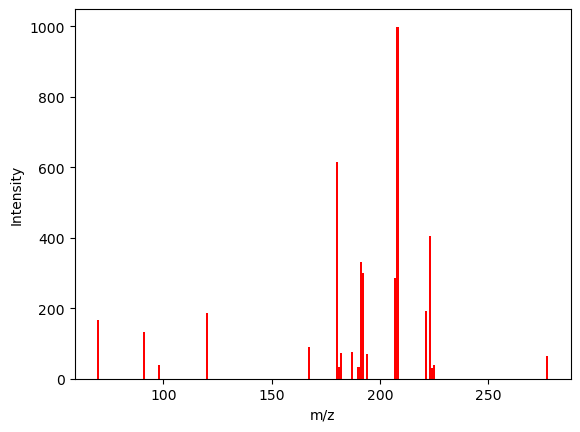

In [5]:
import os
import random
import matplotlib.pyplot as plt
import pandas as pd

def choose_random_file(folder_path):  # choose a random file in the data base
    # Get a list of all files in the folder
    files = os.listdir(folder_path)
    
    # Filter out directories (if any)
    files = [f for f in files if os.path.isfile(os.path.join(folder_path, f))]
    
    # Choose a random file from the list
    random_file = random.choice(files)
    
    # Return the full path to the random file
    return os.path.join(folder_path, random_file)

folder_path = 'C:/Users/genev/projet-prog/AAFC'
random_file = choose_random_file(folder_path)
print("Random file chosen:", random_file)

def get_theoretical_data(file_path, marker): # return the molecular formula and molecular mass of the random molecule
    try: 
        with open(file_path, 'r') as file:
            # Flag to indicate whether the marker has been found
            marker_found = False
            
            # Read lines from the file
            for line in file:
                # Check if the marker is found in the line
                if marker in line:
                    # Extract the data after the marker
                    data = line.split(marker)[-1].strip()
                    
                    # Set the flag to True
                    marker_found = True
                    
                    # Exit the loop after finding the marker
                    break
            
            # Check if the marker was found
            if not marker_found:
                print(f"The marker '{marker}' was not found in the file.")
                return None
            
            # Read and neglect any remaining lines after the marker
            for line in file:
                # Check if the line is empty or contains only whitespace
                if not line.strip():
                    continue  # Skip empty lines
                
                # Check if the line starts with the marker
                if line.strip().startswith(marker):
                    break  # Stop reading lines after encountering the marker
            
            return data
            
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

marker1 = "CH$FORMULA"
marker2 = "CH$EXACT_MASS"
molecular_formula = get_theoretical_data(random_file, marker1)
molecular_weight = get_theoretical_data(random_file, marker2)
if molecular_formula and molecular_weight is not None:
    print(f"Chemical formula {molecular_formula} \nMolecular weight {molecular_weight}")

def extract_spectral_data(file_path, start_marker, stop_marker):
    spectra = []

    try:
        with open(file_path, 'r') as file:
            # Flag to indicate whether the start marker has been found
            start_marker_found = False
            
            # Read lines from the file
            for line in file:
                # Check if the start marker is found in the line
                if start_marker in line:
                    start_marker_found = True
                    continue  # Skip the line containing the start marker
                
                # If the start marker has been found, extract spectral data
                if start_marker_found:
                    # Check if the stop marker is found in the line
                    if stop_marker in line:
                        break  # Stop reading if the stop marker is found
                    
                    # Split the line into columns (assuming space-separated values)
                    columns = line.strip().split()
                    
                    # Convert columns to numerical values
                    spectrum = [float(column) for column in columns]
                    
                    # Add the spectrum to the list of spectra
                    spectra.append(spectrum)
                    
    except Exception as e:
        print(f"Error reading file: {e}")

    return spectra

start_marker = 'PK$PEAK'
stop_marker = '//'
spectra = extract_spectral_data(random_file, start_marker, stop_marker)
print("Spectral data:", spectra)

#create a table displaying the mass spectrum peaks of the molecule
def create_table(spectral_data):
    # Create DataFrame
    df = pd.DataFrame(spectral_data, columns=["m/z", "intensity", "relative intensity"])
    return df
table = create_table(spectra)
table_str = table.to_string(index=False, justify="center")

# Display the table
print(table_str)

#plot the spectrum
mz = [x[0] for x in spectra]
intensity = [x[2] for x in spectra]
fig, ax = plt.subplots()
ax.bar(mz, intensity, color='red', width=1)
ax.set_xlabel('m/z')
ax.set_ylabel('Intensity')

